# Regularized Linear Regression

## Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat=loadmat("ex5data1.mat")

X=mat["X"]
y=mat["y"]
Xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat["Xval"]
yval=mat["yval"]

## Plot the data

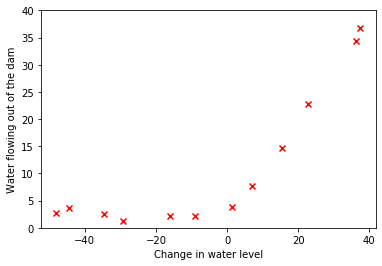

In [3]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylim(0,40)
plt.ylabel("Water flowing out of the dam")
plt.show()

## Compute the Regularized Linear Regression Cost Function

$J(\theta)=\frac{1}{2m}(\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2)+\frac{\lambda}{2m}(\sum_{j=1}^n\theta_j^2)$

In [4]:
def linearRegCostFunction(X, y,theta, Lambda):
    m = len(y)
    
    predictions = X @ theta
    cost = 1/(2*m) * np.sum((predictions - y)**2)
    reg_cost = cost + Lambda/(2*m) * (np.sum(theta[1:]**2))
    
    grad1 = 1/m * X.T @ (predictions - y)
    grad2 = 1/m * X.T @ (predictions - y) + (Lambda/m * theta)
    grad = np.vstack((grad1[0],grad2[1:]))
    
    return reg_cost, grad

In [5]:
m = X.shape[0]
theta = np.ones((2,1))
X_1 = np.hstack((np.ones((m,1)),X))
cost, grad = linearRegCostFunction(X_1, y, theta, 1)
print("Cost at theta = [1 ; 1]:",cost)
print("Gradient at theta = [1 ; 1]:",grad)

Cost at theta = [1 ; 1]: 303.9931922202643
Gradient at theta = [1 ; 1]: [[-15.30301567]
 [598.25074417]]


## Fitting Linear Regression

In [6]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = linearRegCostFunction(X,y,theta,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [7]:
Lambda = 0
theta, J_history = gradientDescent(X_1,y,np.zeros((2,1)),0.001,4000,Lambda)

## Plotting of Cost Function

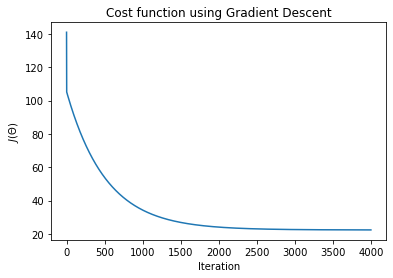

In [8]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

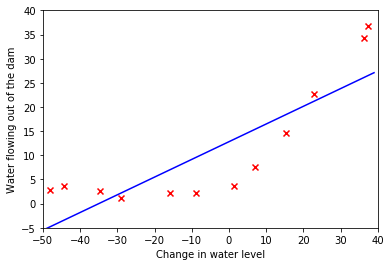

In [9]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=[x for x in range(-50,40)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="b")
plt.ylim(-5,40)
plt.xlim(-50,40)
plt.show()

## Learning curves

train set과 cross validation set의 비교  
(training set size 에 대한 Error)

In [10]:
def learningCurve(X, y, Xval, yval, Lambda):
    m=len(y)
    n=X.shape[1]
    err_train, err_val = [],[]
    
    for i in range(1,m+1):
        theta = gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,3000,Lambda)[0]
        err_train.append(linearRegCostFunction(X, y, theta, Lambda)[0])
        err_val.append(linearRegCostFunction(Xval, yval, theta, Lambda)[0])
        
    return err_train, err_val

In [11]:
Xval_1 = np.hstack((np.ones((21,1)),Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, Lambda)

X.shape

(12, 1)

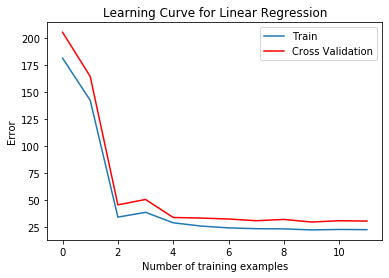

In [12]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [13]:
print("# Training Examples\t Train Error \t\t Cross Validation Error")
for i in range(1,13):
    print("\t",i,"\t\t",error_train[i-1],"\t",error_val[i-1],"\n")

# Training Examples	 Train Error 		 Cross Validation Error
	 1 		 181.18875268582545 	 205.1210957454735 

	 2 		 142.16406057673333 	 164.2535605474932 

	 3 		 34.21399114859212 	 45.54817576824285 

	 4 		 38.63794849056979 	 50.52763121765736 

	 5 		 28.97083763842726 	 33.8818916785026 

	 6 		 25.974708915664046 	 33.33501763960231 

	 7 		 24.26016059707166 	 32.44949025865311 

	 8 		 23.52219156093405 	 30.897434817077908 

	 9 		 23.321924789513332 	 32.09291116304466 

	 10 		 22.383904465511712 	 29.654014029816686 

	 11 		 22.81087522337237 	 30.890073919404436 

	 12 		 22.620437267861497 	 30.554053720180832 



## Polynomial Regression

sklearn.preprocessing import StandardScaler : 사이킷런의 스케일링 클래스 중 하나 (평균이 0과 표준편차가 1이 되도록 변환)
StandardScaler.fit_transform() : 파라미터의 추정 및 데이터셋의 변환

In [14]:
def polyFeatures(X, p):
    for i in range(2,p+1):
        X = np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
    
    return X

In [15]:
p=8
X_poly = polyFeatures(X, p)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_poly=sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

In [16]:
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = sc_X.transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

In [17]:
X_poly_val = polyFeatures(Xval, p)
X_poly_val = sc_X.transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

## Learning Polynomial Regression

여기서 Lambda = 0으로 overfitting이 발생함

In [18]:
theta_poly, J_history_poly = gradientDescent(X_poly,y,np.zeros((9,1)),0.3,20000,Lambda)

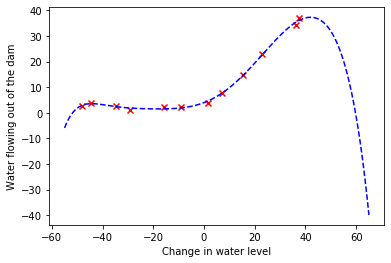

In [19]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [20]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

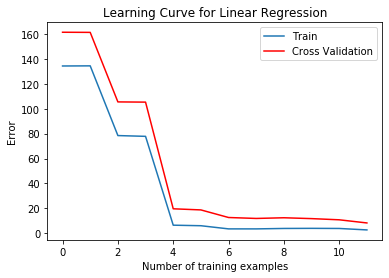

In [21]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

## Polynomial regression with lambda = 100

Lambda의 값이 너무 커지면 theta가 작아지고 각 feature들이 cost에 미치는 영향이 작아져 underfitting이 발생함

In [22]:
Lambda = 100
theta_poly, J_history_poly = gradientDescent(X_poly,y,np.zeros((9,1)),0.01,20000,Lambda)

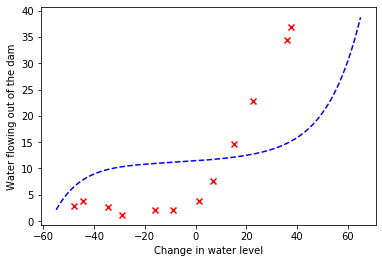

In [23]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [24]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

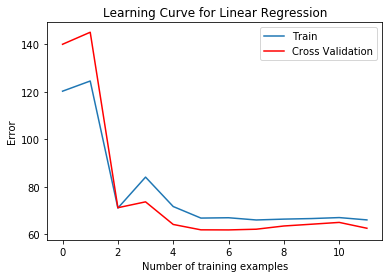

In [25]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [26]:
print(X)

[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]


In [27]:
print(y)

[[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]


In [28]:
print(Xtest)

[[-33.31800399]
 [-37.91216403]
 [-51.20693795]
 [ -6.13259585]
 [ 21.26118327]
 [-40.31952949]
 [-14.54153167]
 [ 32.55976024]
 [ 13.39343255]
 [ 44.20988595]
 [ -1.14267768]
 [-12.76686065]
 [ 34.05450539]
 [ 39.22350028]
 [  1.97449674]
 [ 29.6217551 ]
 [-23.66962971]
 [ -9.01180139]
 [-55.94057091]
 [-35.70859752]
 [  9.51020533]]


In [29]:
print(ytest)

[[ 3.31688953]
 [ 5.39768952]
 [ 0.13042984]
 [ 6.1925982 ]
 [17.08848712]
 [ 0.79950805]
 [ 2.82479183]
 [28.62123334]
 [17.04639081]
 [55.38437334]
 [ 4.07936733]
 [ 8.27039793]
 [31.32355102]
 [39.15906103]
 [ 8.08727989]
 [24.11134389]
 [ 2.4773548 ]
 [ 6.56606472]
 [ 6.0380888 ]
 [ 4.69273956]
 [10.83004606]]


In [30]:
print(Xval)

[[-16.74653578]
 [-14.57747075]
 [ 34.51575866]
 [-47.01007574]
 [ 36.97511905]
 [-40.68611002]
 [ -4.47201098]
 [ 26.53363489]
 [-42.7976831 ]
 [ 25.37409938]
 [-31.10955398]
 [ 27.31176864]
 [ -3.26386201]
 [ -1.81827649]
 [-40.7196624 ]
 [-50.01324365]
 [-17.41177155]
 [  3.5881937 ]
 [  7.08548026]
 [ 46.28236902]
 [ 14.61228909]]


In [31]:
print(yval)

[[ 4.17020201e+00]
 [ 4.06726280e+00]
 [ 3.18730676e+01]
 [ 1.06236562e+01]
 [ 3.18360213e+01]
 [ 4.95936972e+00]
 [ 4.45159880e+00]
 [ 2.22763185e+01]
 [-4.38738274e-05]
 [ 2.05038016e+01]
 [ 3.85834476e+00]
 [ 1.93650529e+01]
 [ 4.88376281e+00]
 [ 1.10971588e+01]
 [ 7.46170827e+00]
 [ 1.47693464e+00]
 [ 2.71916388e+00]
 [ 1.09269007e+01]
 [ 8.34871235e+00]
 [ 5.27819280e+01]
 [ 1.33573396e+01]]
